In [12]:
import pathlib
cwd = pathlib.Path.cwd()
import os
import re
import numpy as np
import glob
from plotly import graph_objects as go
import timeit
import DistanceClass as distance
# from scipy.spatial import distance
# from statsmodels.graphics.tsaplots import plot_acf
import pandas
import pickle
import itertools
import matplotlib.pyplot as plt
import GeneClass as Gene
import random
import Heatmaps as hm
from typing import Tuple
from MomentCalculations import moments_v2
from MomentCalculations import moments
from MomentCalculations import _unrenormalize
from MomentCalculations import multiple_species_plots
from MomentCalculations import moments_v3

Sets up some variables

In [13]:
step = 100
max_n = 3
min_n = 0.5
xticks = {0.5: 0.5, 1.0: 1.0, 1.5: 1.5, 2.0: 2.0, 2.5: 2.5, 3.0: 3.0}
ms = [n / step for n in range(int(step*(min_n)), int(step*max_n) + 1)]
title = f"E v I log w/N divided"

I saved the data with a log transform (on purpose). This unlogs them and saves them.

I think I need to normalize everything by N**(2*k) then take the log? It looks fine when I unrenormalize it.

You may not need to do all these steps: there is an unrenormalization step that if not done causes issues when trying to create the moment plots.

In [14]:
# unlog_exon = _unrenormalize()
with open(cwd / "Dicts_Fixed" / "Exon_6mer.pkl", "rb") as file:
    fixed_exon_data: pandas.DataFrame = pickle.load(file)

In [15]:
# fixed_exon_data.to_pickle(cwd / "Dicts_Fixed" / "Exon_6mer_nLT.pkl")
# fixed_exon_data = _unrenormalize(fixed_exon_data, 12, log2=False)
print(fixed_exon_data)
# # fixed_data = fixed_data / 4**12  # I think we were supposed to do this.

              AAAAAA        AAAAAG        AAAAAT        AAAAAC        AAAAGA  \
CCCCCC  5.854104e-07  1.170821e-07  2.341642e-07  0.000000e+00  0.000000e+00   
CCCCCT  2.341642e-07  0.000000e+00  5.854104e-07  0.000000e+00  0.000000e+00   
CCCCCG  0.000000e+00  0.000000e+00  1.170821e-07  0.000000e+00  2.341642e-07   
CCCCCA  1.170821e-07  1.170821e-07  0.000000e+00  1.170821e-07  2.341642e-07   
CCCCTC  0.000000e+00  3.512463e-07  0.000000e+00  0.000000e+00  2.341642e-07   
...              ...           ...           ...           ...           ...   
AAAAGA  7.259090e-06  1.756231e-06  2.692888e-06  1.522067e-06  1.639149e-06   
AAAAAC  3.067551e-05  1.287903e-06  1.990396e-06  2.107478e-06  1.053739e-06   
AAAAAT  2.329934e-05  1.990396e-06  4.214955e-06  1.873313e-06  9.366567e-07   
AAAAAG  1.264487e-05  1.756231e-06  3.161216e-06  2.458724e-06  4.683284e-07   
AAAAAA  3.209220e-04  3.395381e-05  1.803064e-05  1.393277e-05  1.557192e-05   

              AAAAGG        AAAAGT     

In [16]:
# fixed_exon_data.to_pickle(cwd / "Dicts_Fixed" / "Exon_6mer.pkl")

In [17]:
# unlog_exon = _unrenormalize()
with open(cwd / "Dicts_Fixed" / "Intron_6mer.pkl", "rb") as file:
    fixed_intron_data: pandas.DataFrame = pickle.load(file)

In [18]:
# fixed_intron_data.to_pickle(cwd / "Dicts_Fixed" / "Intron_6mer_nLT.pkl")
# fixed_intron_data = _unrenormalize(fixed_intron_data, 12, log2=False)
print(fixed_intron_data)
# # fixed_data = fixed_data / 4**12  # I think we were supposed to do this.

              AAAAAA        AAAAAG        AAAAAT        AAAAAC        AAAAGA  \
CCCCCC  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
CCCCCT  1.164857e-07  0.000000e+00  1.543435e-06  0.000000e+00  0.000000e+00   
CCCCCG  0.000000e+00  0.000000e+00  2.620928e-07  0.000000e+00  4.950642e-07   
CCCCCA  1.747285e-07  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
CCCCTC  0.000000e+00  4.368213e-07  0.000000e+00  0.000000e+00  0.000000e+00   
...              ...           ...           ...           ...           ...   
AAAAGA  1.461895e-05  2.853899e-06  5.766041e-06  5.824284e-07  1.951135e-06   
AAAAAC  4.219694e-05  3.086871e-06  1.601678e-06  2.009378e-06  2.533564e-06   
AAAAAT  4.892399e-05  4.251727e-06  9.580947e-06  1.310464e-06  1.630800e-06   
AAAAAG  2.469496e-05  1.892892e-06  5.533070e-06  5.911648e-06  4.950642e-07   
AAAAAA  6.229363e-04  7.044472e-05  2.318065e-05  2.128776e-05  3.340227e-05   

              AAAAGG        AAAAGT     

In [19]:
# fixed_intron_data.to_pickle(cwd / "Dicts_Fixed" / "Intron_6mer.pkl")

K = 6
	Imported Exon File
	Imported Intron File
		m = 0.5	N = 16777216.0
		m = 0.51	N = 8737708.39987156
		m = 0.52	N = 4666295.220317386
		m = 0.53	N = 2551685.0992082297
		m = 0.54	N = 1426891.7352228423
		m = 0.55	N = 814956.5606571109
		m = 0.56	N = 474860.0484895941
		m = 0.57	N = 281985.8330341041
		m = 0.58	N = 170487.96140090268
		m = 0.59	N = 104849.9103044397
		m = 0.6	N = 65536.00000000009
		m = 0.61	N = 41599.03078782457
		m = 0.62	N = 26795.02272868485
		m = 0.63	N = 17502.07186230314
		m = 0.64	N = 11585.237502960395
		m = 0.65	N = 7766.650997466475
		m = 0.66	N = 5270.1794222466315
		m = 0.67	N = 3617.796446487984
		m = 0.68	N = 2511.1241589963333
		m = 0.69	N = 1761.5243417926727
		m = 0.7	N = 1248.2699819053835
		m = 0.71	N = 893.1860454584129
		m = 0.72	N = 645.0795775461745
		m = 0.73	N = 470.06365576289903
		m = 0.74	N = 345.4737853511545
		m = 0.75	N = 255.9999999999997
		m = 0.76	N = 191.20114709177446
		m = 0.77	N = 143.89086245194235
		m = 0.78	N = 109.079090742

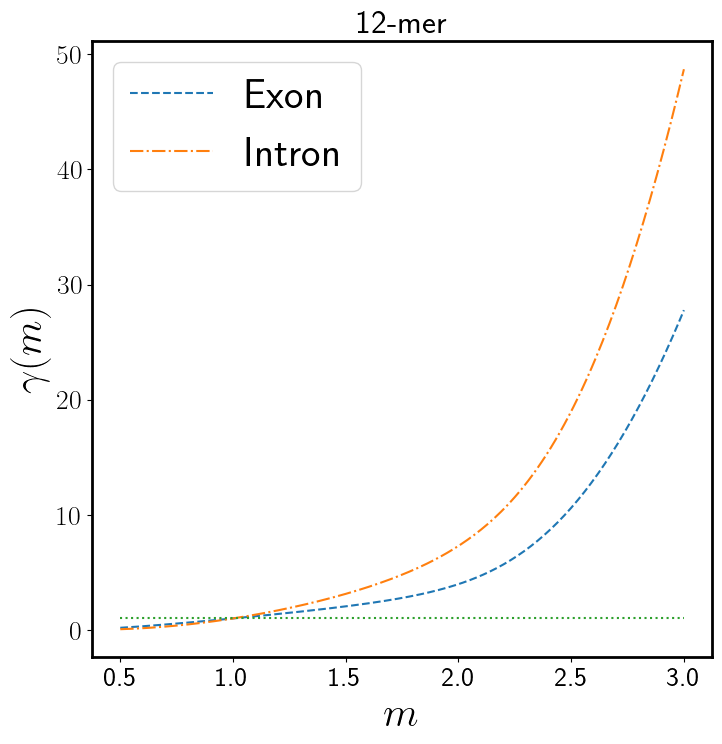

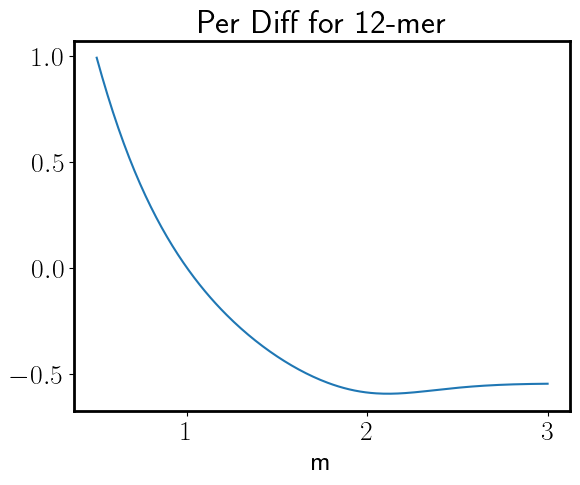

In [20]:
moments_v2(cwd / "Dicts_Fixed", ms, min_k = 6, max_k = 6, 
           convergence = False, logy = False, N_value = True, 
           unlog = False,
           title = title, x_ticks = xticks)


In [21]:
me, mi, mn, uni, _ = moments_v3(cwd / "HS_Dicts_EF_Fixed", ms, min_k=6, N_value = True)

K = 6
		m = 0.5	N = 16777216.0
		m = 0.51	N = 8737708.39987156
		m = 0.52	N = 4666295.220317386
		m = 0.53	N = 2551685.0992082297
		m = 0.54	N = 1426891.7352228423
		m = 0.55	N = 814956.5606571109
		m = 0.56	N = 474860.0484895941
		m = 0.57	N = 281985.8330341041
		m = 0.58	N = 170487.96140090268
		m = 0.59	N = 104849.9103044397
		m = 0.6	N = 65536.00000000009
		m = 0.61	N = 41599.03078782457
		m = 0.62	N = 26795.02272868485
		m = 0.63	N = 17502.07186230314
		m = 0.64	N = 11585.237502960395
		m = 0.65	N = 7766.650997466475
		m = 0.66	N = 5270.1794222466315
		m = 0.67	N = 3617.796446487984
		m = 0.68	N = 2511.1241589963333
		m = 0.69	N = 1761.5243417926727
		m = 0.7	N = 1248.2699819053835
		m = 0.71	N = 893.1860454584129
		m = 0.72	N = 645.0795775461745
		m = 0.73	N = 470.06365576289903
		m = 0.74	N = 345.4737853511545
		m = 0.75	N = 255.9999999999997
		m = 0.76	N = 191.20114709177446
		m = 0.77	N = 143.89086245194235
		m = 0.78	N = 109.07909074285735
		m = 0.79	N = 83.27126499963866
		m

In [22]:
# me = {"Human": {"data": me, "marker": None}}
# mi = {"Human": {"data": mi, "marker": None}}
# mn = {"Human": {"data": mn, "marker": None}}


In [23]:
with open(cwd / "Dicts_Random" / "Random_Exon_6mer.pkl", "rb") as file:
    fixed_data: pandas.DataFrame = pickle.load(file)

fixed_data.to_pickle(cwd / "Dicts_Random" / "Random_Exon_6mer_nLT.pkl")
fixed_data = _unrenormalize(fixed_data, 12, log2=False)
print(fixed_data)
# fixed_data = fixed_data / 4**12  # I think we were supposed to do this.

fixed_data.to_pickle(cwd / "Dicts_Random" / "Exon_6mer.pkl")

              AAAAAA        AAAAAG        AAAAAT        AAAAAC  AAAAGA  \
CCCCCC  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.0   
CCCCCT  0.000000e+00  9.192402e-07  9.192402e-07  0.000000e+00     0.0   
CCCCCG  9.192402e-07  0.000000e+00  0.000000e+00  0.000000e+00     0.0   
CCCCCA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.0   
CCCCTC  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.0   
...              ...           ...           ...           ...     ...   
AAAAGA  0.000000e+00  0.000000e+00  0.000000e+00  9.192402e-07     0.0   
AAAAAC  0.000000e+00  0.000000e+00  0.000000e+00  9.192402e-07     0.0   
AAAAAT  9.192402e-07  0.000000e+00  0.000000e+00  0.000000e+00     0.0   
AAAAAG  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.0   
AAAAAA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00     0.0   

              AAAAGG  AAAAGT  AAAAGC  AAAATA  AAAATG  ...        CCCCGT  \
CCCCCC  0.000000e+00     0.0     0.0

In [24]:
with open(cwd / "Dicts_Random_EP" / "Random_EP_Exon_6mer.pkl", "rb") as file:
    fixed_data: pandas.DataFrame = pickle.load(file)

fixed_data.to_pickle(cwd / "Dicts_Random_EP" / "Random_EP_Exon_6mer_nLT.pkl")
fixed_data = _unrenormalize(fixed_data, 12, log2=False)
print(fixed_data)
# fixed_data = fixed_data / 4**12  # I think we were supposed to do this.

fixed_data.to_pickle(cwd / "Dicts_Random_EP" / "Exon_6mer.pkl")

              AAAAAA        AAAAAG        AAAAAT        AAAAAC        AAAAGA  \
CCCCCC  0.000000e+00  0.000000e+00  1.015211e-07  1.015211e-07  1.015211e-07   
CCCCCT  0.000000e+00  0.000000e+00  2.030421e-07  0.000000e+00  1.015211e-07   
CCCCCG  1.015211e-07  0.000000e+00  1.015211e-07  0.000000e+00  0.000000e+00   
CCCCCA  1.015211e-07  0.000000e+00  0.000000e+00  0.000000e+00  1.015211e-07   
CCCCTC  1.015211e-07  0.000000e+00  1.015211e-07  0.000000e+00  1.015211e-07   
...              ...           ...           ...           ...           ...   
AAAAGA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.030421e-07   
AAAAAC  2.030421e-07  1.015211e-07  0.000000e+00  0.000000e+00  1.015211e-07   
AAAAAT  1.015211e-07  1.015211e-07  0.000000e+00  0.000000e+00  0.000000e+00   
AAAAAG  1.015211e-07  1.015211e-07  2.030421e-07  1.015211e-07  0.000000e+00   
AAAAAA  1.015211e-07  2.030421e-07  1.015211e-07  1.015211e-07  3.045632e-07   

              AAAAGG        AAAAGT     

In [25]:
with open(cwd / "Dicts_Random" / "Random_Intron_6mer.pkl", "rb") as file:
    fixed_data: pandas.DataFrame = pickle.load(file)

fixed_data.to_pickle(cwd / "Dicts_Random" / "Random_Intron_6mer_nLT.pkl")
fixed_data = _unrenormalize(fixed_data, 12, log2=False)
print(fixed_data)
# fixed_data = fixed_data / 4**12  # I think we were supposed to do this.

fixed_data.to_pickle(cwd / "Dicts_Random" / "Intron_6mer.pkl")

              AAAAAA        AAAAAG        AAAAAT        AAAAAC        AAAAGA  \
CCCCCC  0.000000e+00  2.022147e-07  0.000000e+00  0.000000e+00  0.000000e+00   
CCCCCT  0.000000e+00  1.011073e-07  0.000000e+00  0.000000e+00  0.000000e+00   
CCCCCG  1.011073e-07  1.011073e-07  1.011073e-07  1.011073e-07  1.011073e-07   
CCCCCA  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.011073e-07   
CCCCTC  1.011073e-07  2.022147e-07  1.011073e-07  1.011073e-07  0.000000e+00   
...              ...           ...           ...           ...           ...   
AAAAGA  0.000000e+00  1.011073e-07  0.000000e+00  1.011073e-07  0.000000e+00   
AAAAAC  0.000000e+00  1.011073e-07  1.011073e-07  2.022147e-07  0.000000e+00   
AAAAAT  1.011073e-07  1.011073e-07  0.000000e+00  2.022147e-07  1.011073e-07   
AAAAAG  1.011073e-07  0.000000e+00  0.000000e+00  2.022147e-07  0.000000e+00   
AAAAAA  1.011073e-07  0.000000e+00  0.000000e+00  2.022147e-07  1.011073e-07   

              AAAAGG        AAAAGT     

In [26]:
with open(cwd / "Dicts_Random_EP" / "Random_EP_Intron_6mer.pkl", "rb") as file:
    fixed_data: pandas.DataFrame = pickle.load(file)

fixed_data.to_pickle(cwd / "Dicts_Random_EP" / "Random_EP_Intron_6mer_nLT.pkl")
fixed_data = _unrenormalize(fixed_data, 12, log2=False)
print(fixed_data)
# fixed_data = fixed_data / 4**12  # I think we were supposed to do this.

fixed_data.to_pickle(cwd / "Dicts_Random_EP" / "Intron_6mer.pkl")

              AAAAAA        AAAAAG        AAAAAT        AAAAAC        AAAAGA  \
CCCCCC  0.000000e+00  0.000000e+00  1.007610e-07  1.007610e-07  0.000000e+00   
CCCCCT  2.015219e-07  1.007610e-07  2.015219e-07  0.000000e+00  0.000000e+00   
CCCCCG  0.000000e+00  1.007610e-07  1.007610e-07  2.015219e-07  0.000000e+00   
CCCCCA  1.007610e-07  1.007610e-07  1.007610e-07  1.007610e-07  1.007610e-07   
CCCCTC  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...              ...           ...           ...           ...           ...   
AAAAGA  0.000000e+00  0.000000e+00  1.007610e-07  0.000000e+00  1.007610e-07   
AAAAAC  1.007610e-07  0.000000e+00  0.000000e+00  0.000000e+00  1.007610e-07   
AAAAAT  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.007610e-07   
AAAAAG  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.007610e-07   
AAAAAA  0.000000e+00  0.000000e+00  0.000000e+00  1.007610e-07  0.000000e+00   

              AAAAGG        AAAAGT     

In [27]:
rme, rmi, rmn, uni, _ = moments_v3(cwd / "Dicts_Random", ms, min_k = 6, N_value = True)

K = 6
		m = 0.5	N = 16777216.0
		m = 0.51	N = 8737708.39987156
		m = 0.52	N = 4666295.220317386
		m = 0.53	N = 2551685.0992082297
		m = 0.54	N = 1426891.7352228423
		m = 0.55	N = 814956.5606571109
		m = 0.56	N = 474860.0484895941
		m = 0.57	N = 281985.8330341041
		m = 0.58	N = 170487.96140090268
		m = 0.59	N = 104849.9103044397
		m = 0.6	N = 65536.00000000009
		m = 0.61	N = 41599.03078782457
		m = 0.62	N = 26795.02272868485
		m = 0.63	N = 17502.07186230314
		m = 0.64	N = 11585.237502960395
		m = 0.65	N = 7766.650997466475
		m = 0.66	N = 5270.1794222466315
		m = 0.67	N = 3617.796446487984
		m = 0.68	N = 2511.1241589963333
		m = 0.69	N = 1761.5243417926727
		m = 0.7	N = 1248.2699819053835
		m = 0.71	N = 893.1860454584129
		m = 0.72	N = 645.0795775461745
		m = 0.73	N = 470.06365576289903
		m = 0.74	N = 345.4737853511545
		m = 0.75	N = 255.9999999999997
		m = 0.76	N = 191.20114709177446
		m = 0.77	N = 143.89086245194235
		m = 0.78	N = 109.07909074285735
		m = 0.79	N = 83.27126499963866
		m

In [28]:
rmep, rmip, rmnp, uni, _ = moments_v3(cwd / "Dicts_Random_EP", ms, min_k = 6, N_value = True)

K = 6
		m = 0.5	N = 16777216.0
		m = 0.51	N = 8737708.39987156
		m = 0.52	N = 4666295.220317386
		m = 0.53	N = 2551685.0992082297
		m = 0.54	N = 1426891.7352228423
		m = 0.55	N = 814956.5606571109
		m = 0.56	N = 474860.0484895941
		m = 0.57	N = 281985.8330341041
		m = 0.58	N = 170487.96140090268
		m = 0.59	N = 104849.9103044397
		m = 0.6	N = 65536.00000000009
		m = 0.61	N = 41599.03078782457
		m = 0.62	N = 26795.02272868485
		m = 0.63	N = 17502.07186230314
		m = 0.64	N = 11585.237502960395
		m = 0.65	N = 7766.650997466475
		m = 0.66	N = 5270.1794222466315
		m = 0.67	N = 3617.796446487984
		m = 0.68	N = 2511.1241589963333
		m = 0.69	N = 1761.5243417926727
		m = 0.7	N = 1248.2699819053835
		m = 0.71	N = 893.1860454584129
		m = 0.72	N = 645.0795775461745
		m = 0.73	N = 470.06365576289903
		m = 0.74	N = 345.4737853511545
		m = 0.75	N = 255.9999999999997
		m = 0.76	N = 191.20114709177446
		m = 0.77	N = 143.89086245194235
		m = 0.78	N = 109.07909074285735
		m = 0.79	N = 83.27126499963866
		m

In [29]:
# multiple_species_plots(ms, me, mi, mn, uni, cwd / "TE_Images_ForPaper" / "InterGenome", x_ticks={0.5: 0.5, 1.0: 1.0, 1.5: 1.5, 2.0: 2.0},  y_ticks = {0: 0, 7: 7})


me_plots = {"Human": {"data": me, "marker": None}, "Random": {"data": rme, "marker": None}, "Random EP": {"data": rmep, "marker": None}}
mi_plots = {"Human": {"data": mi, "marker": None}, "Random": {"data": rmi, "marker": None}, "Random EP": {"data": rmip, "marker": None}}
# mn = {"Human": {"data": mn, "marker": None}}
mn_plots = None

In [30]:
print(me_plots)

{'Human': {'data': {6: [0.18797681129548202, 0.2000354724524314, 0.2123848494647366, 0.22501423256288713, 0.2379131171163255, 0.25107123065863884, 0.26447855498902434, 0.2781253439227377, 0.29200213721228213, 0.30609977111242254, 0.32040938601619356, 0.33492243154613976, 0.34963066944531757, 0.36452617457593717, 0.37960133429998877, 0.39484884648571117, 0.4102617163559749, 0.42583325236971853, 0.44155706130483796, 0.4574270426908847, 0.4734373827215407, 0.48958254776074045, 0.5058572775418422, 0.5222565781462721, 0.5387757148367234, 0.5554102048098426, 0.5721558099243221, 0.5890085294524943, 0.6059645928964651, 0.6230204529037818, 0.6401727783122206, 0.6574184473485787, 0.6747545410022638, 0.6921783365909266, 0.7096873015322801, 0.7272790873335018, 0.7449515238074835, 0.762702613523036, 0.7805305264945632, 0.7984335951153608, 0.8164103093373581, 0.8344593120992497, 0.8525793950041252, 0.8707694942470113, 0.8890286867922466, 0.9073561868002982, 0.9257513423031526, 0.944213632127484, 0.9

In [31]:
print(mi_plots)

{'Human': {'data': {6: [0.06346958022300012, 0.07030749152489243, 0.07759396620734653, 0.08533669192112459, 0.09354262370319441, 0.10221801367248054, 0.11136844242342495, 0.12099885160510765, 0.13111357724175315, 0.14171638341294657, 0.1528104959686618, 0.16439863600538335, 0.176483052875411, 0.18906555654210813, 0.2021475491297999, 0.21573005554852823, 0.2298137531013646, 0.24439900000578027, 0.25948586278109886, 0.27507414247160744, 0.29116339968977395, 0.30775297847662647, 0.3248420289868276, 0.3424295290146594, 0.3605143043842547, 0.3790950482331484, 0.3981703392227154, 0.4177386587126649, 0.4377984069392836, 0.45834791823911075, 0.47938547536093157, 0.5009093229097027, 0.5229176799663021, 0.545408751926956, 0.568380741605718, 0.5918318596428196, 0.615760334260869, 0.6401644204098995, 0.6650424083411623, 0.6903926316484507, 0.7162134748144585, 0.7425033802984858, 0.7692608552004685, 0.7964844775351633, 0.8241729021488998, 0.8523248663103146, 0.8809391950050612, 0.9100148059635933, 

Species = Human
plotting for 12-mer
Species = Random
plotting for 12-mer
Species = Random EP
plotting for 12-mer


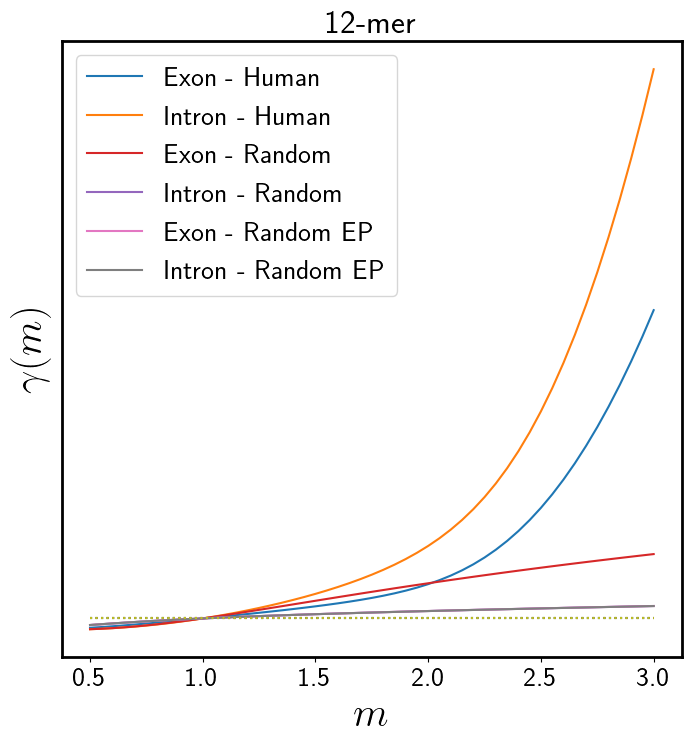

In [32]:
multiple_species_plots(ms, me_plots, mi_plots, mn_plots, uni, cwd / "TE_Images_ForPaper" / "Random", x_ticks = xticks)

In [33]:
dicts_moments_folder = cwd / "Dicts_Moments"

with open(dicts_moments_folder / "Exons.pkl", "wb") as file:
    pickle.dump(me, file)

with open(dicts_moments_folder / "Introns.pkl", "wb") as file:
    pickle.dump(mi, file)

with open(dicts_moments_folder / "Random_Exons.pkl", "wb") as file:
    pickle.dump(rme, file)

with open(dicts_moments_folder / "Random_Introns.pkl", "wb") as file:
    pickle.dump(rmi, file)

with open(dicts_moments_folder / "Random_Exons_EP.pkl", "wb") as file:
    pickle.dump(rmep, file)

with open(dicts_moments_folder / "Random_Introns_EP.pkl", "wb") as file:
    pickle.dump(rmip, file)

In [34]:
# me_humans = {"Human": {"data": me, "marker": None}}
me_humans = None
mi_humans = {"Human": {"data": mi, "marker": None}}
mn_humans = {"Human": {"data": mn, "marker": None}}

Species = Human
plotting for 12-mer


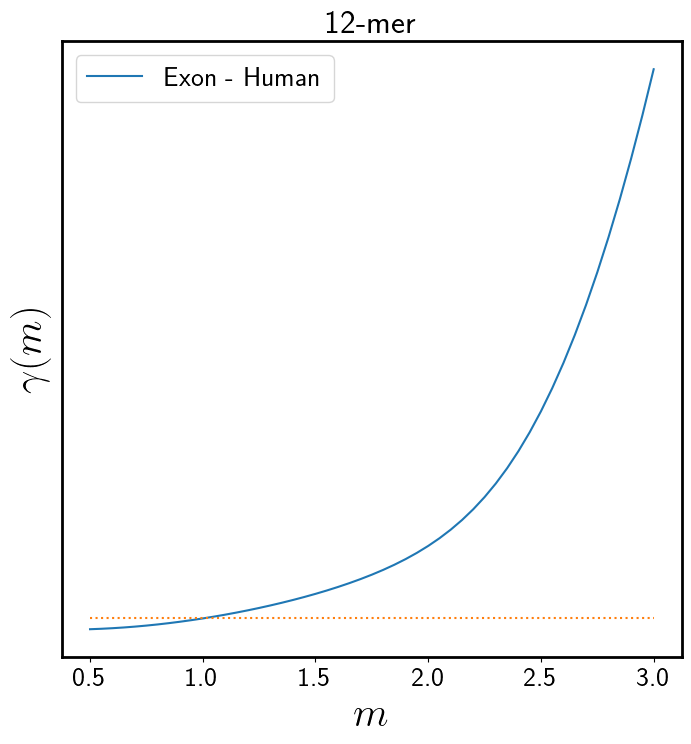

In [35]:
multiple_species_plots(ms, me_humans, mi_humans, mn_humans, uni, cwd / "TE_Images_ForPaper" / "Sanity", x_ticks = xticks)